In [20]:
import numpy as np
import pandas as pd
import xarray as xr

from trade_tester.tester import render_candles

from keras.models import Sequential, Model
from keras import layers
import tensorflow as tf
from keras.optimizers import Adam
# отключим GPU (нужно для платформы Apple M1)
tf.config.set_visible_devices([], 'GPU')

### Load and preprocessing data

In [4]:
with xr.open_dataarray('dataset.nc') as dataset:
    # Разделение данных на обучающую и тестовую выборки
    split_index = int(0.8 * dataset.shape[0])
    train_data = dataset[:split_index].to_numpy()
    test_data = dataset[split_index:].to_numpy()

### Create models

In [8]:
def create_conv1d_autoencoder(input_shape=(100, 144)):
    # Encoder
    encoder = Sequential([
        layers.InputLayer(input_shape=input_shape),
        layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPooling1D(pool_size=2, padding='same'),
        layers.Dropout(0.1),
        layers.Conv1D(32, kernel_size=3, activation='relu', padding='same')
    ])
    
    # Decoder
    decoder = Sequential([
        layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'),
        layers.UpSampling1D(size=2),
        layers.Dropout(0.1),
        layers.Conv1D(144, kernel_size=3, activation='sigmoid', padding='same')
    ])
    
    # Autoencoder
    autoencoder = Sequential([
        encoder,
        decoder
    ])
    
    return autoencoder

def create_conv2d_autoencoder(input_shape=(100, 144, 1)):
    # Encoder
    encoder = Sequential([
        layers.InputLayer(input_shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
        layers.Dropout(0.1),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')
    ])
    
    # Decoder
    decoder = Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.UpSampling2D(size=(2, 2)),
        layers.Dropout(0.1),
        layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
    ])
    
    # Autoencoder
    autoencoder = Sequential([
        encoder,
        decoder
    ])
    
    return autoencoder

### Fit models

In [6]:
conv1d_autoencoder = create_conv1d_autoencoder()
conv1d_autoencoder.compile(optimizer='adam', loss='mse')

conv1d_autoencoder.fit(train_data, train_data,
                epochs=10,
                batch_size=32,
                shuffle=True,
                validation_data=(test_data, test_data))

conv1d_autoencoder.save('best_model/autoencoder1d.h5')

Epoch 1/10


2023-04-17 18:58:18.385864: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-17 18:58:19.664280: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1669c8f10 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-04-17 18:58:19.664298: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2023-04-17 18:58:19.691146: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


  14/2371 [..............................] - ETA: 30s - loss: 0.0628

2023-04-17 18:58:19.984800: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2371/2371 [==============================] - 34s 14ms/step - loss: 0.0177 - val_loss: 0.0110
Epoch 2/10
2371/2371 [==============================] - 24s 10ms/step - loss: 0.0134 - val_loss: 0.0096
Epoch 3/10
2371/2371 [==============================] - 23s 10ms/step - loss: 0.0126 - val_loss: 0.0090
Epoch 4/10
2371/2371 [==============================] - 24s 10ms/step - loss: 0.0122 - val_loss: 0.0086
Epoch 5/10
2371/2371 [==============================] - 24s 10ms/step - loss: 0.0119 - val_loss: 0.0085
Epoch 6/10
2371/2371 [==============================] - 24s 10ms/step - loss: 0.0118 - val_loss: 0.0084
Epoch 7/10
2371/2371 [==============================] - 26s 11ms/step - loss: 0.0116 - val_loss: 0.0083
Epoch 8/10
2371/2371 [==============================] - 26s 11ms/step - loss: 0.0115 - val_loss: 0.0083
Epoch 9/10
2371/2371 [==============================] - 25s 11ms/step - loss: 0.0114 - val_loss: 0.0082
Epoch 10/10
593/593 [==============================] - 2s 3ms/step - loss: 

In [9]:
train_data2 = train_data[:, :, :, None]
test_data2 = test_data[:, :, :, None]
conv2d_autoencoder = create_conv2d_autoencoder()
conv2d_autoencoder.compile(optimizer='adam', loss='mse')

conv2d_autoencoder.fit(train_data2, train_data2,
                epochs=10,
                batch_size=32,
                shuffle=True,
                validation_data=(test_data2, test_data2))

conv2d_autoencoder.save('best_model/autoencoder1d.h5')

Epoch 1/10
2371/2371 [==============================] - 517s 217ms/step - loss: 0.0045 - val_loss: 0.0018
Epoch 2/10
2371/2371 [==============================] - 503s 212ms/step - loss: 0.0027 - val_loss: 0.0015
Epoch 3/10
2371/2371 [==============================] - 507s 214ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 4/10
2371/2371 [==============================] - 508s 214ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 5/10
2371/2371 [==============================] - 523s 220ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 6/10
2371/2371 [==============================] - 509s 215ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 7/10
2371/2371 [==============================] - 514s 217ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 8/10
2371/2371 [==============================] - 519s 219ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 9/10
2371/2371 [==============================] - 524s 221ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 10/10
2371/2371 [=======================

In [10]:
conv1d_autoencoder.evaluate(test_data, test_data)
conv2d_autoencoder.evaluate(test_data2, test_data2)

593/593 [==============================] - 25s 42ms/step - loss: 0.0013


0.0012772718910127878

In [11]:
predict1 = conv1d_autoencoder.predict(test_data)
predict2 = conv2d_autoencoder.predict(test_data2)

593/593 [==============================] - 27s 45ms/step


In [18]:
df = pd.DataFrame(predict1[0, :, :4], columns=['open', 'high', 'low', 'close']).reset_index()
df = df.rename(columns={'index': 'date'})

df2 = pd.DataFrame(predict2[0, :, :4, 0], columns=['open', 'high', 'low', 'close']).reset_index()
df2 = df2.rename(columns={'index': 'date'})

df3 = pd.DataFrame(test_data[0, :, :4], columns=['open', 'high', 'low', 'close']).reset_index()
df3 = df3.rename(columns={'index': 'date'})

4


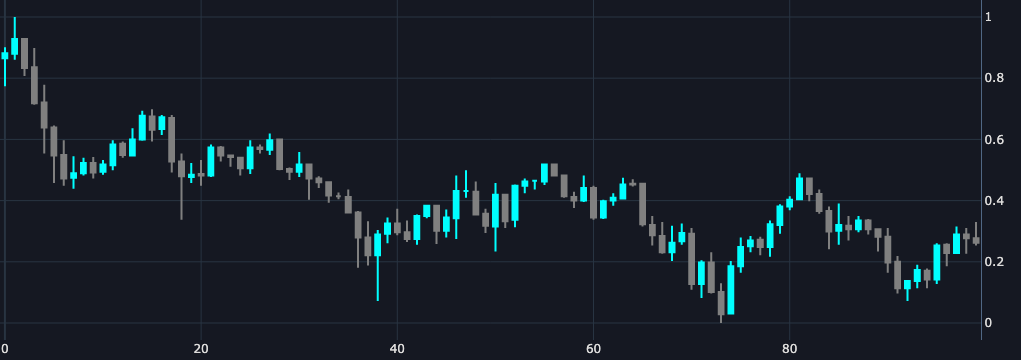

In [22]:
render_candles(df3)

4


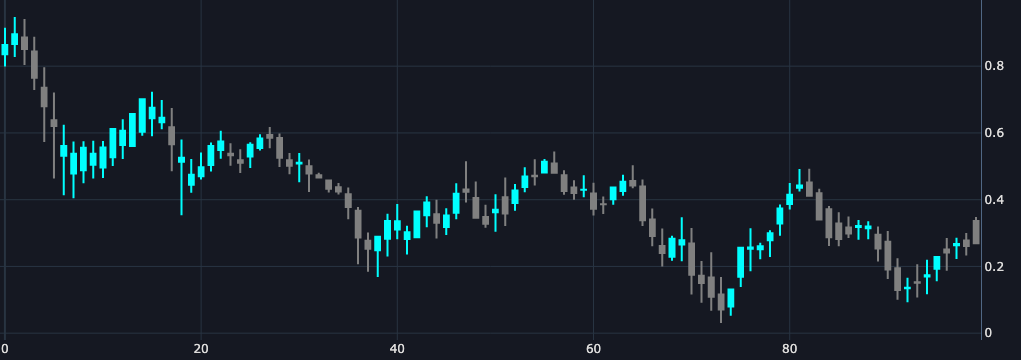

In [25]:
render_candles(df2)